In [40]:
import matplotlib.pyplot as plt

In [41]:
import numpy as np

In [42]:
import pickle

In [43]:
from fit import *

In [44]:
%matplotlib inline

In [45]:
!ls test-5d/validation_data

alpha.npy   amp_22.npy	coords.npy  phi_21.npy	times.npy
amp_21.npy  beta.npy	gamma.npy   phi_22.npy


In [46]:
!ls test-5d/pre_processing

preprocessing_params.npz  times_scaler.pkl


In [47]:
datafile_1 = 'test-5d/validation_data/amp_22.npy'
datafile_2 = 'test-5d/validation_data/amp_21.npy'

In [48]:
filename = 'test-5d/validation_data/coords.npy'
coords_train = np.load(filename)
coords_train = coords_train.T

# load times data
filename = 'test-5d/validation_data/times.npy'
times = np.load(filename)

pkl_filename = 'test-5d/pre_processing/times_scaler.pkl'
with open(pkl_filename, 'rb') as file:
    times_scaler = pickle.load(file)

times_scaled = times_scaler.transform(times[:, np.newaxis])


filename = 'test-5d/pre_processing/preprocessing_params.npz'
y_processing_params = np.load(filename)

y_train_amp_22 = load_coprec_data_and_apply_preproc(
    'test-5d/validation_data', 'amp_22', y_processing_params)
y_train_amp_21 = load_coprec_data_and_apply_preproc(
    'test-5d/validation_data', 'amp_21', y_processing_params)

y_train = np.stack(
    (y_train_amp_22, y_train_amp_21), axis=2)

output_shape = 2

In [49]:
y_train.shape

(1000, 1219, 2)

In [50]:
times_scaled.shape

(1219, 1)

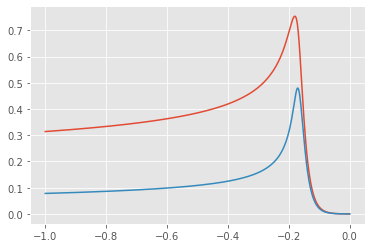

In [51]:
plt.figure()
plt.plot(times_scaled[:,0], y_train[0,:,0])
plt.plot(times_scaled[:,0], y_train[0,:,1])

# data sequence generator

In [130]:
train_dataset = DataGenv2(
    X=coords_train,
    t=times_scaled,
    y=y_train,
    X_batch_size=4,
#     t_batch_size=times_scaled.shape[0]//3,
    t_batch_size=100,
    output_shape=output_shape,
    shuffle=True)

In [131]:
train_dataset

In [132]:
train_dataset.__len__()

250

In [133]:
for num, (data, labels) in enumerate(train_dataset):
    print(data.shape, labels.shape)
    if num > 15: break

(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)


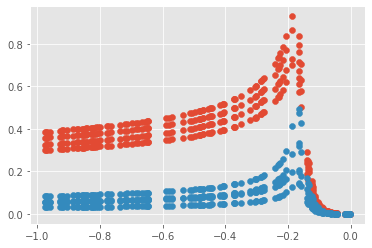

In [134]:
plt.figure()
plt.scatter(data[:,0], labels[:,0])
plt.scatter(data[:,0], labels[:,1])

In [135]:
for num, (data, labels) in enumerate(train_dataset):
    print(data.shape, labels.shape)
    if num > 15: break

(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)
(400, 8) (400, 2)


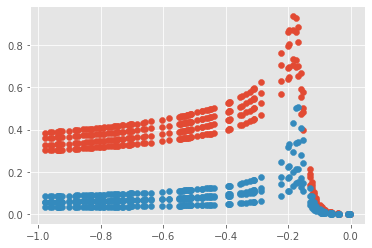

In [136]:
plt.figure()
plt.scatter(data[:,0], labels[:,0])
plt.scatter(data[:,0], labels[:,1])